## AutoLiftout Figures


In [1]:
%load_ext autoreload
%autoreload 2

from fibsem.detection import detection

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, glob

from fibsem.structures import FibsemImage

import os
from copy import deepcopy
from pathlib import Path

import napari
import napari.utils.notifications
import numpy as np
import tifffile as tff
from PyQt5 import QtWidgets

from fibsem.detection import detection
from fibsem.detection import utils as det_utils
from fibsem.detection.detection import DetectedFeatures
from fibsem.segmentation import model as fibsem_model
from fibsem.segmentation.model import load_model
from fibsem.structures import (
    BeamType,
    FibsemImage,
    Point,
)
from PyQt5.QtCore import pyqtSignal
from fibsem.ui.qtdesigner_files import FibsemDetectionWidget
import logging

CHECKPOINT_PATH = os.path.join(os.path.dirname(fibsem_model.__file__), "models", "model4.pt")

/home/patrick/miniconda3/envs/fibsem/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Error: 'ImageDescription'


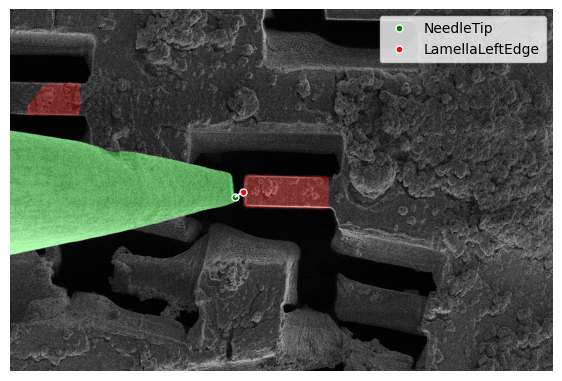

Error: 'ImageDescription'


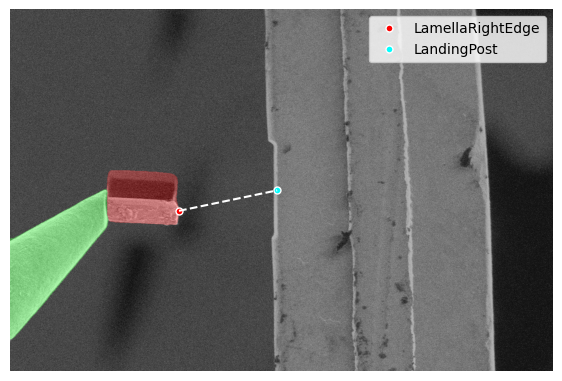

Error: 'ImageDescription'


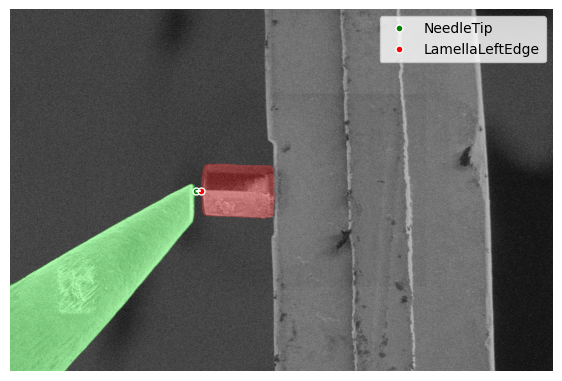

In [25]:
liftout_start = "/home/patrick/github/autoliftout/docs/img/01-subtle-bear/tif/needle_liftout_start_position_eb.tif"
landing_ready = "/home/patrick/github/autoliftout/docs/img/01-subtle-bear/tif/landing_needle_ready_position_ib.tif"
landing_finish = "/home/patrick/github/autoliftout/docs/img/01-subtle-bear/tif/landing_lamella_needle_removal_low_res_ib.tif"


weld_exposure = "/home/patrick/github/autoliftout/docs/img/01-subtle-bear/tif/ref_landing_lamella_high_res_ib.tif"
weld_spot = ""

checkpoint = str(CHECKPOINT_PATH)
encoder="resnet34"
num_classes = 3
model = load_model(checkpoint=checkpoint, encoder=encoder, nc=num_classes)


filenames = [liftout_start, landing_ready, landing_finish]

feature_list = [[detection.NeedleTip(), detection.LamellaLeftEdge()],
[detection.LamellaRightEdge(), detection.LandingPost()], 
[detection.NeedleTip(), detection.LamellaLeftEdge()]]


for fname, features in zip(filenames, feature_list):
    image = FibsemImage.load(fname)

    # detect features
    pixelsize = image.metadata.pixel_size.x if image.metadata is not None else 25e-9
    det = detection.locate_shift_between_features_v2(
        deepcopy(image.data), model, features=features, pixelsize=pixelsize
    )

    fig, ax = plt.subplots(1, 1, figsize=(7, 5))

    ax.imshow(det.image, cmap="gray")
    ax.imshow(det.rgb, alpha=0.3)
    # ax.set_title("Prediction")
    ax.axis("off")
    for f in det.features:
        
        if isinstance(f, (detection.LamellaCentre, 
                          detection.LamellaLeftEdge, 
                          detection.LamellaRightEdge)):
            f.color = "red"

        ax.plot(f.px.x, f.px.y, 
                    "o",  color=f.color, 
                    markersize=5, markeredgecolor="w", 
                    label=f.name)
    ax.legend(loc="best")

    if len(det.features) == 2:
        # plot white line between features
        ax.plot([det.features[0].px.x, det.features[1].px.x],
                    [det.features[0].px.y, det.features[1].px.y], 
                    color="w", linestyle="--")

    # save fig dpi=300
    save_path = os.path.join(os.getcwd(), "figures")
    os.makedirs(save_path, exist_ok=True)
    basename = os.path.basename(fname).replace(".tif", ".png")
    plt.savefig(os.path.join(save_path, basename), dpi=300, bbox_inches="tight")

    plt.show()


In [29]:
# convert to png
weld_exposure = "/home/patrick/github/autoliftout/docs/img/01-subtle-bear/tif/ref_landing_lamella_high_res_ib.tif"
weld_spot = "/home/patrick/github/fibsem/scratch/figure/liftout/ref_landing_lamella_high_res_ib.tif"

outnames = ["weld_exposure.png", "weld_spot.png"]
filenames = [weld_exposure, weld_spot]
for fname, outname in zip(filenames, outnames):

    image = FibsemImage.load(fname)
    image.data = image.data.astype(np.float32)

    # save as png
    save_path = os.path.join(os.getcwd(), "figures")
    os.makedirs(save_path, exist_ok=True)
    basename = outname
    plt.imsave(os.path.join(save_path, basename), image.data, cmap="gray")


Error: 'ImageDescription'
Error: 'ImageDescription'
